In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# plt.savefig(
#     f"normal_pdf_shaded.png",
#     dpi=150,
#     bbox_inches="tight",
#     facecolor="white",
# )

# Set style for clean, professional plots
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

## 1. Normal PDF with Shaded Region P(a ≤ X ≤ b)

Shows the probability density function with a highlighted vertical strip between values `a` and `b`.

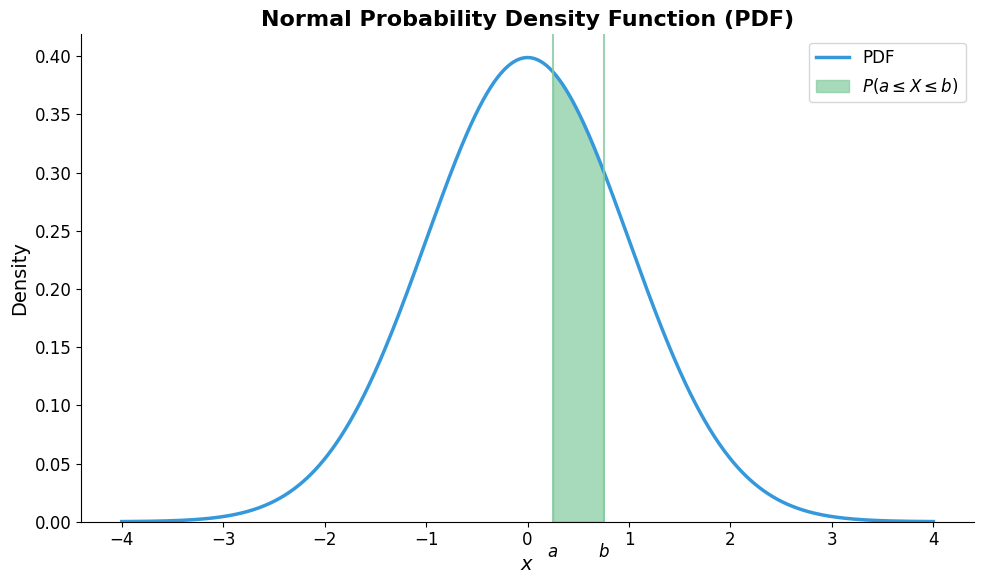

In [5]:
# Normal PDF with shaded region
fig, ax = plt.subplots(figsize=(10, 6))

# Parameters
mu, sigma = 0, 1
a, b = 0.25, 0.75  # Region to highlight

# Generate x values
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, mu, sigma)

# Plot the PDF curve
ax.plot(x, y, color="#3498db", linewidth=2.5, label="PDF")

# Fill the region between a and b
x_fill = np.linspace(a, b, 100)
y_fill = stats.norm.pdf(x_fill, mu, sigma)
ax.fill_between(
    x_fill, y_fill, color="#82c99e", alpha=0.7, label=r"$P(a \leq X \leq b)$"
)

# Add vertical lines at a and b
ax.axvline(x=a, color="#82c99e", linestyle="-", linewidth=1.5, alpha=0.8)
ax.axvline(x=b, color="#82c99e", linestyle="-", linewidth=1.5, alpha=0.8)

# Labels and formatting
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("Density", fontsize=14)
ax.set_title(
    "Normal Probability Density Function (PDF)", fontsize=16, fontweight="bold"
)
ax.legend(loc="upper right", fontsize=12)
ax.set_ylim(bottom=0)

# Add annotations for a and b
ax.annotate("$a$", xy=(a, 0), xytext=(a, -0.03), fontsize=12, ha="center")
ax.annotate("$b$", xy=(b, 0), xytext=(b, -0.03), fontsize=12, ha="center")

plt.tight_layout()
plt.show()

## 2. Normal CDF with P(X ≤ x) Highlighted

Shows the cumulative distribution function with the area to the left of `x` representing the probability.

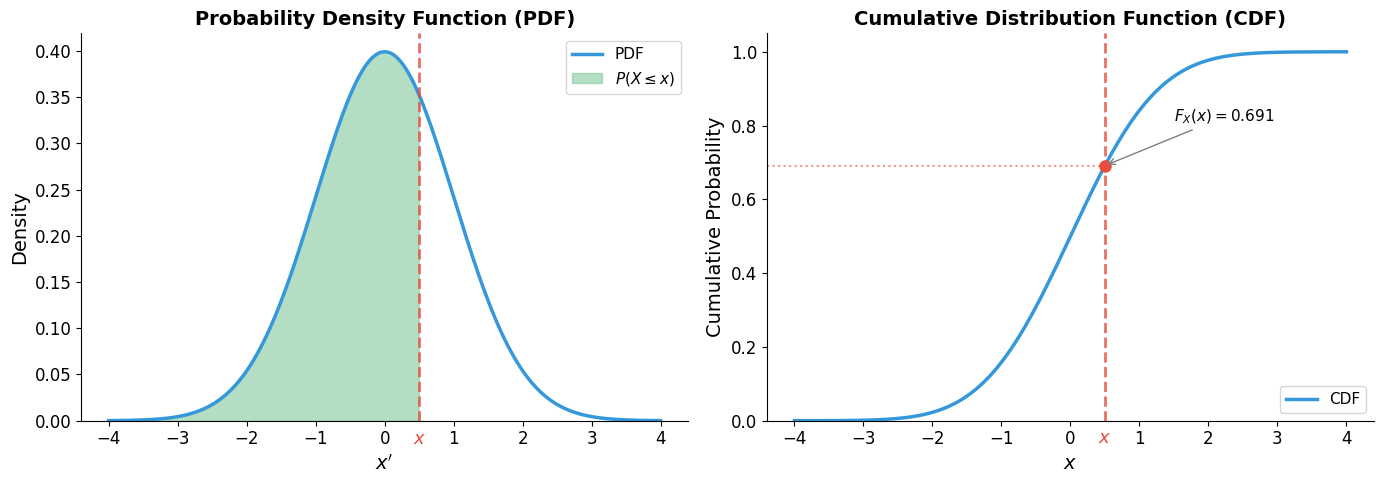

In [6]:
# PDF and CDF side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Parameters
mu, sigma = 0, 1
x_val = 0.5  # Point where we show P(X <= x)

# Generate x values
x = np.linspace(-4, 4, 1000)
y_pdf = stats.norm.pdf(x, mu, sigma)
y_cdf = stats.norm.cdf(x, mu, sigma)
cdf_at_x = stats.norm.cdf(x_val, mu, sigma)

# ===== LEFT PLOT: PDF with shaded region =====
ax1 = axes[0]

# Plot the PDF curve
ax1.plot(x, y_pdf, color="#3498db", linewidth=2.5, label="PDF")

# Fill the region to the left of x_val (under the PDF curve)
x_fill = x[x <= x_val]
y_fill = stats.norm.pdf(x_fill, mu, sigma)
ax1.fill_between(x_fill, y_fill, color="#82c99e", alpha=0.6, label=r"$P(X \leq x)$")

# Add vertical line at x
ax1.axvline(x=x_val, color="#e74c3c", linestyle="--", linewidth=2, alpha=0.8)

# Labels and formatting
ax1.set_xlabel(r"$x'$", fontsize=14)
ax1.set_ylabel("Density", fontsize=14)
ax1.set_title("Probability Density Function (PDF)", fontsize=14, fontweight="bold")
ax1.legend(loc="upper right", fontsize=11)
ax1.set_ylim(bottom=0)

# Add annotation for x
ax1.annotate(
    r"$x$",
    xy=(x_val, 0),
    xytext=(x_val, -0.025),
    fontsize=13,
    ha="center",
    color="#e74c3c",
)

# ===== RIGHT PLOT: CDF (no shading) =====
ax2 = axes[1]

# Plot the CDF curve
ax2.plot(x, y_cdf, color="#3498db", linewidth=2.5, label="CDF")

# Add vertical and horizontal lines to show F(x)
ax2.axvline(x=x_val, color="#e74c3c", linestyle="--", linewidth=2, alpha=0.8)
ax2.axhline(
    y=cdf_at_x, color="#e74c3c", linestyle=":", linewidth=1.5, alpha=0.6, xmax=0.56
)

# Add point marker
ax2.plot(x_val, cdf_at_x, "o", color="#e74c3c", markersize=8)

# Labels and formatting
ax2.set_xlabel(r"$x$", fontsize=14)
ax2.set_ylabel("Cumulative Probability", fontsize=14)
ax2.set_title("Cumulative Distribution Function (CDF)", fontsize=14, fontweight="bold")
ax2.legend(loc="lower right", fontsize=11)
ax2.set_ylim(0, 1.05)

# Add annotations
ax2.annotate(
    r"$x$",
    xy=(x_val, 0),
    xytext=(x_val, -0.06),
    fontsize=13,
    ha="center",
    color="#e74c3c",
)
ax2.annotate(
    f"$F_X(x) = {cdf_at_x:.3f}$",
    xy=(x_val, cdf_at_x),
    xytext=(x_val + 1.0, cdf_at_x + 0.12),
    fontsize=11,
    arrowprops=dict(arrowstyle="->", color="gray", lw=1),
)

plt.tight_layout()
plt.show()

## 3. Uniform Distribution on [0, 1]

Shows both PDF and CDF for the standard uniform distribution.

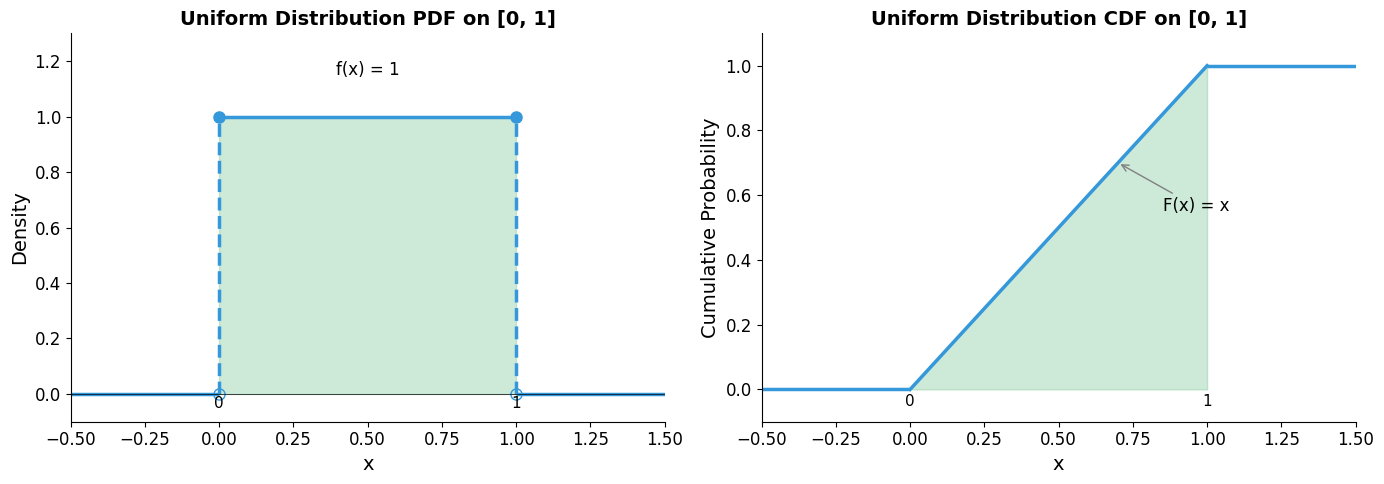

In [7]:
# Uniform Distribution on [0, 1]
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Parameters
a_uniform, b_uniform = 0, 1

# Generate x values (extended range to show the flat parts)
x_extended = np.linspace(-0.5, 1.5, 1000)

# PDF
ax1 = axes[0]
y_pdf = stats.uniform.pdf(x_extended, a_uniform, b_uniform - a_uniform)

# Plot PDF - need to handle the discontinuities
ax1.hlines(y=0, xmin=-0.5, xmax=0, color="#3498db", linewidth=2.5)
ax1.hlines(y=1, xmin=0, xmax=1, color="#3498db", linewidth=2.5, label="PDF")
ax1.hlines(y=0, xmin=1, xmax=1.5, color="#3498db", linewidth=2.5)

# Vertical lines at boundaries (dashed to show discontinuity)
ax1.vlines(x=0, ymin=0, ymax=1, color="#3498db", linewidth=2.5, linestyle="--")
ax1.vlines(x=1, ymin=0, ymax=1, color="#3498db", linewidth=2.5, linestyle="--")

# Points to show open/closed intervals
ax1.plot([0, 1], [1, 1], "o", color="#3498db", markersize=8)  # Filled at boundaries
ax1.plot(
    [0, 1], [0, 0], "o", color="#3498db", markersize=8, fillstyle="none"
)  # Open circles

# Fill the uniform region
ax1.fill_between([0, 1], [1, 1], color="#82c99e", alpha=0.4)

ax1.set_xlabel("x", fontsize=14)
ax1.set_ylabel("Density", fontsize=14)
ax1.set_title("Uniform Distribution PDF on [0, 1]", fontsize=14, fontweight="bold")
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.1, 1.3)
ax1.axhline(y=0, color="black", linewidth=0.5)

# Annotations
ax1.annotate("f(x) = 1", xy=(0.5, 1), xytext=(0.5, 1.15), fontsize=12, ha="center")
ax1.annotate("0", xy=(0, -0.05), fontsize=11, ha="center")
ax1.annotate("1", xy=(1, -0.05), fontsize=11, ha="center")

# CDF
ax2 = axes[1]

# Plot CDF - piecewise
ax2.hlines(y=0, xmin=-0.5, xmax=0, color="#3498db", linewidth=2.5)
x_middle = np.linspace(0, 1, 100)
ax2.plot(x_middle, x_middle, color="#3498db", linewidth=2.5, label="CDF")
ax2.hlines(y=1, xmin=1, xmax=1.5, color="#3498db", linewidth=2.5)

# Fill under CDF
ax2.fill_between(x_middle, x_middle, color="#82c99e", alpha=0.4)

ax2.set_xlabel("x", fontsize=14)
ax2.set_ylabel("Cumulative Probability", fontsize=14)
ax2.set_title("Uniform Distribution CDF on [0, 1]", fontsize=14, fontweight="bold")
ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-0.1, 1.1)

# Annotations
ax2.annotate(
    "F(x) = x",
    xy=(0.7, 0.7),
    xytext=(0.85, 0.55),
    fontsize=12,
    arrowprops=dict(arrowstyle="->", color="gray", lw=1),
)
ax2.annotate("0", xy=(0, -0.05), fontsize=11, ha="center")
ax2.annotate("1", xy=(1, -0.05), fontsize=11, ha="center")

plt.tight_layout()
plt.show()

## 4. Cauchy Distribution PDF

The Cauchy distribution has heavy tails and no defined mean or variance.

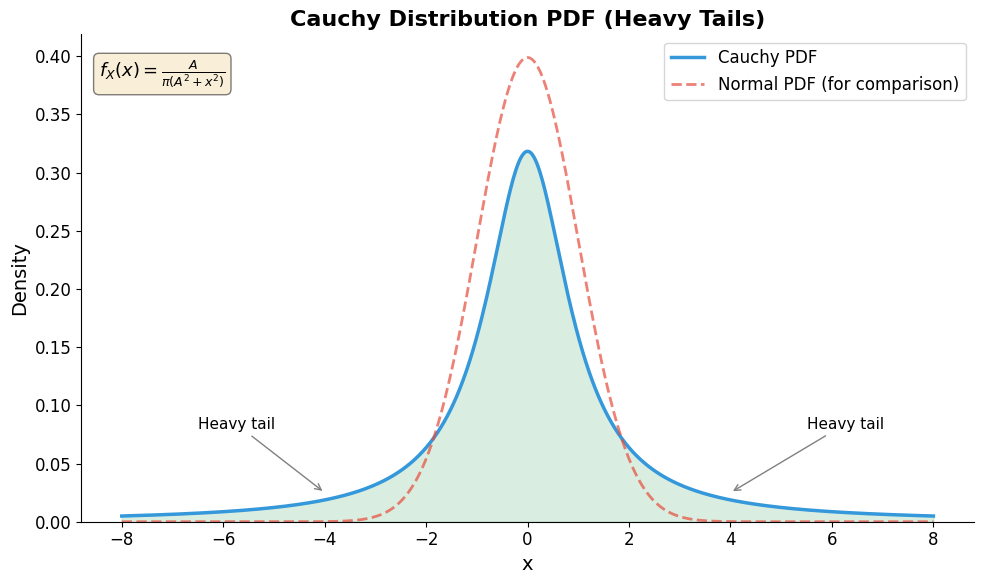

In [ ]:
# Cauchy Distribution PDF
fig, ax = plt.subplots(figsize=(10, 6))

# Parameters (location=0, scale=1 for standard Cauchy)
x0, gamma = 0, 1

# Generate x values
x = np.linspace(-8, 8, 1000)
y_cauchy = stats.cauchy.pdf(x, x0, gamma)

# Plot the Cauchy PDF
ax.plot(x, y_cauchy, color="#3498db", linewidth=2.5, label="Cauchy PDF")

# Fill under the curve
ax.fill_between(x, y_cauchy, color="#82c99e", alpha=0.3)

# Compare with Normal distribution (same location and scale)
y_normal = stats.norm.pdf(x, x0, gamma)
ax.plot(
    x,
    y_normal,
    color="#e74c3c",
    linewidth=2,
    linestyle="--",
    alpha=0.7,
    label="Normal PDF (for comparison)",
)

# Labels and formatting
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("Density", fontsize=14)
ax.set_title("Cauchy Distribution PDF (Heavy Tails)", fontsize=16, fontweight="bold")
ax.legend(loc="upper right", fontsize=12)
ax.set_ylim(bottom=0)

# Add annotation about heavy tails
ax.annotate(
    "Heavy tail",
    xy=(4, 0.025),
    xytext=(5.5, 0.08),
    fontsize=11,
    arrowprops=dict(arrowstyle="->", color="gray", lw=1),
)
ax.annotate(
    "Heavy tail",
    xy=(-4, 0.025),
    xytext=(-6.5, 0.08),
    fontsize=11,
    arrowprops=dict(arrowstyle="->", color="gray", lw=1),
)

# Add formula
ax.text(
    0.02,
    0.95,
    r"$f_X(x) = \frac{A}{\pi (A^2 + x^2)}$",
    transform=ax.transAxes,
    fontsize=13,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
)

plt.tight_layout()
plt.show()